[View in Colaboratory](https://colab.research.google.com/github/yoonlee78/Tensorflow/blob/master/handson_Chapter_09_tensorflow.ipynb)

In [0]:
from google.colab import files
from IPython.display import Image

In [7]:
uploaded = files.upload()

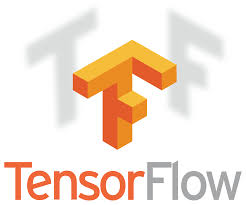

# **9장 텐서플로 시작하기**

TensorFlow

 - 수치 계산을 위한 오픈소스 소프트웨어 라이브러리
 - 대규모 머신러닝에 맞춰 잘 튜닝되어있음
 - 구글 브레인 (Google Brain)팀에서 개발,  구글 클라우드 스피치 (Google Cloud Speech, Google Photos, Google Search 등의 대규모 서비스 지원)
 
 원리: 
 
 1. 파이썬으로 수행할 Computation graph (계산 그래프) 정의 
 2. TensorFlow가 최적화된 C++ 코드를 사용해 이 그래프를 효율적으로 실행
 
 ----
 

장점 1.

- 병렬 실행 (CPU + GPU)
- 분산 컴퓨팅 지원 (수백 대의 서버에 계산을 나누어 길지 않은 시간 안에(in a reasonable amount of time) 대규모 데이터셋으로 거대한 신경망 훈련 가능)

장점 2. (책 내용 발췌)

- **Windows, Linux, and macOS, but also on mobile devices, including both iOS and Android**.
-**TF.Learn** 
- **TF-slim** 
- API **Keras or Pretty Tensor**.<br>
- **more flexibility** (at the cost of higher complexity) to create all sorts of computations, including any neural network architecture you can think of.<br>
- highly **efficient C++ implementations of many ML operations** <br>
- <b>automatic differentiating (or autodiff)</b>.<br>
- **TensorBoard **(visualization tool)

> • Google also launched a cloud service to run TensorFlow graphs. <br>
• more great projects are being built on top of it (for examples, check out the resources page on https://www.tensorflow.org/, or https://github.com/jtoy/awesome-tensorflow). <br> To ask technical questions, you should use http://stackoverflow.com/ and tag your question with "tensorflow". You can file bugs and feature requests through GitHub. <br> For general discussions, join the Google group.<br>




In [8]:
Image("libraries list.png", width=600)

In [9]:
9.1 

9.1

## 9.1 설치
### **colab에서는 간단히 import만해도 가능함** <br>
### 그 외: 


```
# 가상환경 (virtualenv) -> 주피터 노트북
pip install --upgrade tensorflow
```
gpu를 사용하려면 tensorflow대신 tensorflow-gpu 설치.


In [0]:
import tensorflow

In [11]:
# 버전 확인
!python3 -c 'import tensorflow; print(tensorflow.__version__)

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


*SETUP* 

In [0]:
#to support both python2 and python3

from __future__ import division, print_function, unicode_literals

#common imports

import numpy as np
import os

# to make this notebook's output stable across runs

def reset_graph(seed = 42):
  tf.reset_default_graph()
  tf.set_random_seed(seed)
  np.random.seed(seed)
  
# to plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"

def save_fig(fig_id, tight_layout = True):
  path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format = 'png', dpi = 300)
  

**9.2  Our First Computational Graph & Run **


In [0]:
import tensorflow as tf

#reset_graph()

x = tf.Variable(3, name = 'x')
y = tf.Variable(4, name = 'y')
f = x*x*y + y + 2

In [19]:
f

<tf.Tensor 'add_13:0' shape=() dtype=int32>

In [20]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [0]:
#기타 분산환경에서의 세션 지정 및 관리는 12단원에서

**9.3 계산 그래프 관리**


노드를 만들면 자동으로 기본 계산 그래프에 추가됨. 


In [22]:
reset_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

대부분 이걸로 충분하나, 가끔 독립적인 계산 그래프를 다수 생성해야할 경우, 새 graph 객체를 만든 후, with 블록 안에서 임시로 이를 기본 계산 그래프로 사용 가능

In [27]:
graph = tf.Graph()
with graph.as_default():
  x2 = tf.Variable(2)
  
x2.graph is graph

True

주피터 등의 작업환경에서 실험을 해봐야하는 경우, 같은 명령을 여러번 실행하는 경우가 많음.
이렇게 하면 기본 그래프에 중복된 노드가 많이 포함되므로 주피터 커널(또는 파이썬 셀)을 다시 시작하는 것도 방법이긴하나, 더 편리한 방법은 tf.reset_default_graph()로 기본 그래프를 초기화해주는 것임. 

In [28]:
x2.graph is tf.get_default_graph()


False

## 9.4 노드 값의 생애 주기

한 노드를 평가할 때 텐서플로는 이 노드가 의존하고 있는 다른 노드들을 자동으로 찾아 먼저 평가함. 



In [29]:
#예시
#간단한 그래프 정의 
w = tf.constant(3)
x = w +2 
y = x + 5
z = x*3

#세션

with tf.Session() as sess: #세션 시작
  print(y.eval()) #y그래프 평가
 
  print(z.eval()) #15

10
15


 텐서플로는 자동으로 y가 x에 의존한다는 것과 x가 w에 의존한다는 것을 감지함. 그래서 먼저 w를 평가하고 그 다음에  x를, 그 다음에 y를 평가해서 y 값을 변환함. 
 마지막으로 z 평가를 위해 그래프를 실행. 다시 한번 텐서플로우는 먼저 w와 x를 평가해야한다는 것을 감지함. 이전에 평가된 w와 x를 재사용하지 않는다는 점이 중요** 
 in sum, 위 코드는 w와 z를 두번 평가함. 
 

**  이전 코드에서처럼 w와 z를 두번 평가하지 않고, y와 z를 효율적으로 평가하려면 tf가 한 번의 그래프를 실행하면서 y와 z를 모두 평가하도록 만들어야함. 


In [30]:
with tf.Session() as sess:
  y_val, z_val = sess.run([y,z])
  print(y_val) #10
  print(z_val) #15

10
15


## 9.5 Tensorflow 를 이용한 선형회귀 연산(operation)

ops (tensorflow operation, 텐서플로 연산)
- 여러개의 입력을 받아 출력을 만들 수 있음.  (e.g., 덧셈과 곱셈 연산은 두 개의 입력을 받아 하나의 출력을 만듦)

source ops (소스 연산): 상수와 변수 연산은 입력이 없음

입력과 출력은 tensor (텐서)라는 다차원 배열.

넘파이 배열과 비슷하게 텐서는 데이터 타입과 크기를 가짐. 
(파이썬 API에서 텐서를 평가한 결과는 넘파이 배열로 변환됨(ndarray))

보통은 float(실수)로 채워지나, 문자열(임의의 바이트 배열)을 저장할 수 있음. 



Example dataset.

Price of california housing

- 선형회귀 수행을 위해 2D 배열을 다룸
- 데이터셋 추출 후 모든 훈련 샘플 편향에 대한 입력 특성(x0 = 1)을 추가함 (이 부분은 numpy를 사용하므로 즉시 실행됨)
- 2개의 tf constant node x 와 y를 생성, data 와 target을 담는다. 
- 행렬 연산을 사용해 theta 정의.  (필요한 행렬 함수는 transpose(), matmul(), matrix_inverse(), 하지만 이 함수들은 계산을 즉각 수행하지 않음. 대신 그래프가 실행될 때 계산을 수행할 노드를 생성함. theta의 정의는 정규방정식, 4장 참조). 
- 마지막으로 코드는 세션을 생성, theta를 평가함. 

In [0]:
import sklearn.datasets

In [35]:
import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_with_bias = np.c_[np.ones((m,1)), housing.data]

X = tf.constant(housing_with_bias, dtype =tf.float32, name = "X")

y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name = "y")

XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

with tf.Session() as sess:
  theta_value = theta.eval()